In [214]:
import numpy as np
import pandas as pd
from datetime import datetime

In [215]:
# Create the dataset from Government of Canada website
data_date = np.asarray([datetime(2021,1,6), datetime(2021,1,7), datetime(2021,1,8), datetime(2021,1,9), datetime(2021,1,10), datetime(2021,1,11), datetime(2021,1,12), datetime(2021,1,13), datetime(2021,1,14), datetime(2021,1,15), datetime(2021,1,16), datetime(2021,1,17), datetime(2021,1,18), datetime(2021,1,19), datetime(2021,1,20), datetime(2021,1,21), datetime(2021,1,22), datetime(2021,1,23), datetime(2021,1,24), datetime(2021,1,25), datetime(2021,1,26), datetime(2021,1,27), datetime(2021,1,28), datetime(2021,1,29), datetime(2021,1,30), datetime(2021,1,31), datetime(2021,2,1), datetime(2021,2,2), datetime(2021,2,3), datetime(2021,2,4), datetime(2021,2,5), datetime(2021,2,6), datetime(2021,2,7), datetime(2021,2,8), datetime(2021,2,9), datetime(2021,2,10), datetime(2021,2,11), datetime(2021,2,12), datetime(2021,2,13), datetime(2021,2,14), datetime(2021,2,15), datetime(2021,2,16), datetime(2021,2,17), datetime(2021,2,18), datetime(2021,2,19), datetime(2021,2,20), datetime(2021,2,21), datetime(2021,2,22), datetime(2021,2,23), datetime(2021,2,24), datetime(2021,2,25), datetime(2021,2,26), datetime(2021,2,27), datetime(2021,2,28), datetime(2021,3,1), datetime(2021,3,2), datetime(2021,3,3), datetime(2021,3,4), datetime(2021,3,5), datetime(2021,3,6), datetime(2021,3,7), datetime(2021,3,8), datetime(2021,3,9), datetime(2021,3,10), datetime(2021,3,11), datetime(2021,3,12), datetime(2021,3,13), datetime(2021,3,14), datetime(2021,3,15), datetime(2021,3,16), datetime(2021,3,17), datetime(2021,3,18), datetime(2021,3,19), datetime(2021,3,20), datetime(2021,3,21), datetime(2021,3,22), datetime(2021,3,23), datetime(2021,3,24)])
data_total_individuals_fully_vaccinated = np.asarray([430, 1087, 2027, 2940, 2942, 2942, 3023, 4389, 6647, 8547, 9667, 10857, 10876, 12805, 16181, 20113, 24646, 29854, 31441, 35628, 41643, 48230, 55286, 61679, 67787, 68849, 70293, 72057, 74994, 80977, 87831, 96573, 101744, 106163, 115529, 125725, 136988, 151282, 164307, 174643, 182137, 186934, 195366, 205802, 217715, 229151, 235922, 240669, 247042, 251590, 255449, 258014, 260972, 262103, 263214, 264896, 266710, 268118, 269063, 270625, 271807, 273676, 276193, 279204, 281714, 282748, 284686, 285615, 287283, 288918, 290659, 292269, 294749, 297134, 298549, 299297, 301043, 302664])
df = pd.DataFrame({'report_date': data_date, 'total_individuals_fully_vaccinated': data_total_individuals_fully_vaccinated})

In [216]:
df.head()

,report_date,total_individuals_fully_vaccinated
0,2021-01-06,430
1,2021-01-07,1087
2,2021-01-08,2027
3,2021-01-09,2940
4,2021-01-10,2942


In [217]:
df.dtypes

report_date                           datetime64[ns]
total_individuals_fully_vaccinated             int32
dtype: object

In [218]:
# create column that calculates percentage of population vaccinated
ont_pop = 14745040
per_pop_vaccinated = df['total_individuals_fully_vaccinated'].apply(lambda x: (x/ont_pop) * 100)
df['per_pop_vaccinated'] = per_pop_vaccinated
df.columns

Index(['report_date', 'total_individuals_fully_vaccinated',
       'per_pop_vaccinated'],
      dtype='object')

In [219]:
df.head()

,report_date,total_individuals_fully_vaccinated,per_pop_vaccinated
0,2021-01-06,430,0.002916
1,2021-01-07,1087,0.007372
2,2021-01-08,2027,0.013747
3,2021-01-09,2940,0.019939
4,2021-01-10,2942,0.019952


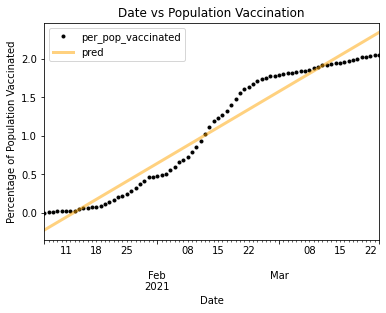

In [283]:
# testing
from sklearn import linear_model
import matplotlib.pyplot as plt

ax = df.plot(x='report_date', y='per_pop_vaccinated', color='black', style='.')
df.plot(x='report_date', y='pred', color='orange', linewidth=3, ax=ax, alpha=0.5)
ax.set_title('Date vs Population Vaccination')
ax.set_xlabel('Date')
ax.set_ylabel('Percentage of Population Vaccinated')

plt.show()

# source: https://stackoverflow.com/questions/54352621/sklearn-linear-regression-with-date-data/54353045

In [222]:
df

,report_date,total_individuals_fully_vaccinated,per_pop_vaccinated,pred
0,2021-01-06,430,0.002916,-0.224468
1,2021-01-07,1087,0.007372,-0.191177
2,2021-01-08,2027,0.013747,-0.157887
3,2021-01-09,2940,0.019939,-0.124596
4,2021-01-10,2942,0.019952,-0.091305
...,...,...,...,...
73,2021-03-20,297134,2.015145,2.205762
74,2021-03-21,298549,2.024742,2.239053
75,2021-03-22,299297,2.029815,2.272343
76,2021-03-23,301043,2.041656,2.305634


In [223]:
# Model Building
# Logistic Regression
# Decision Tree Classifier
# Random Forest Classifier

X = df.report_date
y = df.per_pop_vaccinated

In [224]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [225]:
X_train.head()

3    2021-01-09
22   2021-01-28
7    2021-01-13
26   2021-02-01
42   2021-02-17
Name: report_date, dtype: datetime64[ns]

In [226]:
X.head()

0   2021-01-06
1   2021-01-07
2   2021-01-08
3   2021-01-09
4   2021-01-10
Name: report_date, dtype: datetime64[ns]

In [227]:
y_train.head()

3     0.019939
22    0.374946
7     0.029766
26    0.476723
42    1.324961
Name: per_pop_vaccinated, dtype: float64

In [228]:
y.head()

0    0.002916
1    0.007372
2    0.013747
3    0.019939
4    0.019952
Name: per_pop_vaccinated, dtype: float64

In [229]:
# Model Building
# linear regression
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train.values.reshape(-1, 1), y_train)
y_pred_regr = regr.predict(X_test.values.astype(float).reshape(-1, 1))
y_pred_regr


array([ 1.40458824,  0.66573728,  0.76648968,  1.87476613,  1.2702517 ,
        2.07627094,  2.21060748,  2.27777575,  1.37100411,  1.67326132,
        1.10233103,  1.841182  , -0.1738661 ,  2.10985508,  1.63967719,
        0.90082622])

In [231]:
# random forest regressor
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# feature = input / x 
# label = output / y
rf.fit(X_train.values.reshape(-1, 1), y_train)
y_pred_rf = rf.predict(X_test.values.astype(float).reshape(-1, 1))
y_pred_rf

array([1.72457981, 0.48543342, 0.5775361 , 1.90564324, 1.5045675 ,
       1.94872161, 2.00403637, 2.02960229, 1.63508774, 1.82392248,
       1.23280676, 1.85855088, 0.01059842, 1.97488763, 1.79634908,
       0.75780996])

In [239]:
# calculate the accuracy scores
# a r2_score of 1 means that model completely fit and explain variance in the data
from sklearn.metrics import r2_score
r2_score_regr = r2_score(y_test, y_pred_regr)
r2_score_regr

0.9066322487967869

In [240]:
r2_score_rf = r2_score(y_test, y_pred_rf)
r2_score_rf

0.9989889061960754

In [279]:
# making predictions
xnew = np.asarray([datetime(2027,1, 1), datetime(2027, 2, 1)])
df_new = pd.DataFrame({'report_date': xnew})
df_new_pred = df_new['report_date']
ynew_regr = regr.predict(df_new_pred.values.astype(float).reshape(-1, 1))
df_new['y_pred_regr'] = ynew_regr
df_new

,report_date,y_pred_regr
0,2027-01-01,73.173885
1,2027-02-01,74.214993
